In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
#cities

593

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | los llanos de aridane
Processing Record 2 of Set 1 | wanning
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | kirovo-chepetsk
Processing Record 5 of Set 1 | mount isa
Processing Record 6 of Set 1 | burns lake
Processing Record 7 of Set 1 | tacoronte
Processing Record 8 of Set 1 | cap-aux-meules
Processing Record 9 of Set 1 | salalah
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | la ronge
Processing Record 12 of Set 1 | narsaq
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | ismailia
Processing Record 17 of Set 1 | anshun
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | sabha
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | grootfontein
Processing Record 22 of Se

Processing Record 39 of Set 4 | murgab
Processing Record 40 of Set 4 | kelo
Processing Record 41 of Set 4 | meulaboh
Processing Record 42 of Set 4 | ust-omchug
Processing Record 43 of Set 4 | fortuna
Processing Record 44 of Set 4 | clyde river
Processing Record 45 of Set 4 | ilulissat
Processing Record 46 of Set 4 | yenagoa
Processing Record 47 of Set 4 | katherine
Processing Record 48 of Set 4 | longyearbyen
Processing Record 49 of Set 4 | tubinskiy
Processing Record 50 of Set 4 | ponta delgada
Processing Record 1 of Set 5 | deputatskiy
Processing Record 2 of Set 5 | honiara
Processing Record 3 of Set 5 | sistranda
Processing Record 4 of Set 5 | sorland
Processing Record 5 of Set 5 | katsuura
Processing Record 6 of Set 5 | saleaula
City not found. Skipping...
Processing Record 7 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 5 | mukdahan
Processing Record 9 of Set 5 | grand gaube
Processing Record 10 of Set 5 | panaba
Processing Record 11 of Set 5 | pe

Processing Record 27 of Set 8 | tagusao
Processing Record 28 of Set 8 | boshkengash
Processing Record 29 of Set 8 | sosnovo-ozerskoye
Processing Record 30 of Set 8 | whitehorse
Processing Record 31 of Set 8 | raudeberg
Processing Record 32 of Set 8 | derzhavinsk
Processing Record 33 of Set 8 | kermanshah
Processing Record 34 of Set 8 | high level
Processing Record 35 of Set 8 | baindur
Processing Record 36 of Set 8 | peque
Processing Record 37 of Set 8 | faanui
Processing Record 38 of Set 8 | novyy urgal
Processing Record 39 of Set 8 | burgeo
Processing Record 40 of Set 8 | changji
Processing Record 41 of Set 8 | georgetown
Processing Record 42 of Set 8 | khonuu
City not found. Skipping...
Processing Record 43 of Set 8 | beringovskiy
Processing Record 44 of Set 8 | tanjong sepat
City not found. Skipping...
Processing Record 45 of Set 8 | pemangkat
Processing Record 46 of Set 8 | shelburne
Processing Record 47 of Set 8 | barreirinhas
Processing Record 48 of Set 8 | kaputa
Processing Rec

Processing Record 16 of Set 12 | kasba
Processing Record 17 of Set 12 | baghdad
Processing Record 18 of Set 12 | jujuy
City not found. Skipping...
Processing Record 19 of Set 12 | valparaiso
Processing Record 20 of Set 12 | lucea
Processing Record 21 of Set 12 | afyonkarahisar
Processing Record 22 of Set 12 | dubbo
Processing Record 23 of Set 12 | ambilobe
Processing Record 24 of Set 12 | uray
Processing Record 25 of Set 12 | catuday
Processing Record 26 of Set 12 | hasaki
Processing Record 27 of Set 12 | verkhoyansk
Processing Record 28 of Set 12 | roros
Processing Record 29 of Set 12 | panzhihua
Processing Record 30 of Set 12 | tura
Processing Record 31 of Set 12 | barawe
City not found. Skipping...
Processing Record 32 of Set 12 | kidal
Processing Record 33 of Set 12 | inuvik
Processing Record 34 of Set 12 | dakar
Processing Record 35 of Set 12 | taveta
Processing Record 36 of Set 12 | istria
Processing Record 37 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 3

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Los Llanos De Aridane,28.6585,-17.9182,58.75,74,9,5.99,ES,2022-01-29 21:12:03
1,Wanning,18.8003,110.3967,62.60,87,100,9.42,CN,2022-01-29 21:12:04
2,Bredasdorp,-34.5322,20.0403,64.27,72,5,10.98,ZA,2022-01-29 21:12:04
3,Kirovo-Chepetsk,58.5539,50.0399,6.33,97,99,4.70,RU,2022-01-29 21:12:05
4,Mount Isa,-20.7333,139.5000,74.97,100,75,6.91,AU,2022-01-29 21:12:05
5,Burns Lake,54.2331,-125.7533,33.13,86,100,4.72,CA,2022-01-29 21:12:05
6,Tacoronte,28.4769,-16.4102,59.94,66,40,8.99,ES,2022-01-29 21:12:06
7,Cap-Aux-Meules,47.3821,-61.8597,26.65,93,100,47.18,CA,2022-01-29 21:12:06
8,Salalah,17.0151,54.0924,71.69,73,0,1.14,OM,2022-01-29 21:09:34
9,Bluff,-46.6000,168.3333,58.39,88,100,6.85,NZ,2022-01-29 21:12:07


In [23]:
# Reorder the columns: City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed,
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Los Llanos De Aridane,ES,2022-01-29 21:12:03,28.6585,-17.9182,58.75,74,9,5.99
1,Wanning,CN,2022-01-29 21:12:04,18.8003,110.3967,62.60,87,100,9.42
2,Bredasdorp,ZA,2022-01-29 21:12:04,-34.5322,20.0403,64.27,72,5,10.98
3,Kirovo-Chepetsk,RU,2022-01-29 21:12:05,58.5539,50.0399,6.33,97,99,4.70
4,Mount Isa,AU,2022-01-29 21:12:05,-20.7333,139.5000,74.97,100,75,6.91
5,Burns Lake,CA,2022-01-29 21:12:05,54.2331,-125.7533,33.13,86,100,4.72
6,Tacoronte,ES,2022-01-29 21:12:06,28.4769,-16.4102,59.94,66,40,8.99
7,Cap-Aux-Meules,CA,2022-01-29 21:12:06,47.3821,-61.8597,26.65,93,100,47.18
8,Salalah,OM,2022-01-29 21:09:34,17.0151,54.0924,71.69,73,0,1.14
9,Bluff,NZ,2022-01-29 21:12:07,-46.6000,168.3333,58.39,88,100,6.85


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

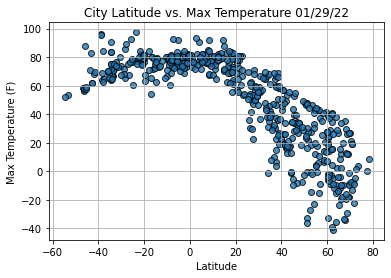

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

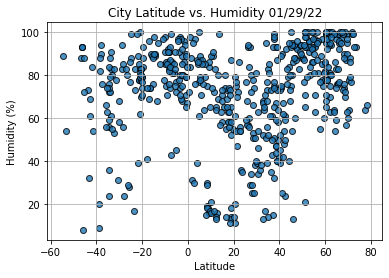

In [31]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

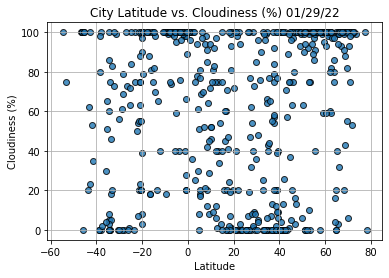

In [32]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

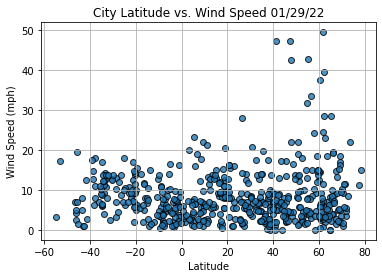

In [36]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()